# Analisis Sentimen Ulasan Aplikasi Taspen Otentikasi Menggunakan Metode Klasifikasi Algoritma Naive Bayes

# scraping data

In [ ]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

# Impor paket yang diperlukan

In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.hisign.feacapan',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi taspen yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, # disini jumlah ulasan yang mau kita ambil ada lima ribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1645bed6-e53f-43c9-a7b5-9e342818d3f8,M T,https://play-lh.googleusercontent.com/a-/ALV-U...,Otentikasi berulang-ulang juga selalu gagal.. ...,1,7,1.6.9,2023-10-28 02:19:32,None,NaT,1.6.9
1,5fdac21a-c1bd-488f-85db-0541cd9d41e0,Relly Wicahyadi,https://play-lh.googleusercontent.com/a/ACg8oc...,Terima kasih TASPEN..setelah update yang v 169...,5,154,1.6.9,2023-10-12 07:05:09,None,NaT,1.6.9
2,765fbed9-7cc8-49cc-91f0-dcf2aada0815,Budi Sugono,https://play-lh.googleusercontent.com/a/ACg8oc...,Waahhh... harus berapakali mengulang dan mengu...,5,50,1.6.9,2023-10-10 10:33:48,None,NaT,1.6.9
3,9f2c9382-68f4-4b75-af95-17979bdc9e82,Linda Lisyani,https://play-lh.googleusercontent.com/a/ACg8oc...,Maaf sebelum nya kenapa sudah di upgrade aplik...,1,12,1.6.9,2023-10-25 00:38:04,None,NaT,1.6.9
4,09a811ca-40cf-4e25-a032-df594179c544,REFNA WIRDASE,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi sering eror, jangankan orang tua beru...",2,60,1.6.9,2023-10-07 07:26:16,None,NaT,1.6.9


In [ ]:
len(df_busu.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

5000

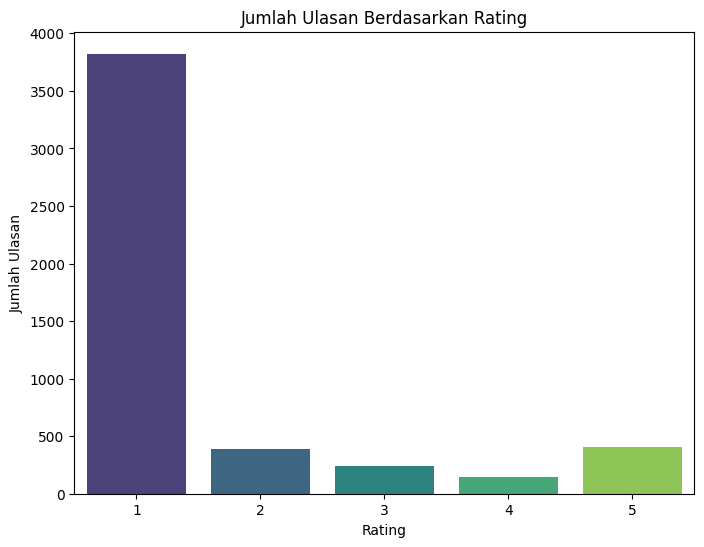

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah ulasan berdasarkan rating
rating_counts = df_busu['score'].value_counts().sort_index()

# Plot grafik
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.title('Jumlah Ulasan Berdasarkan Rating')
plt.show()


In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,M T,1,2023-10-28 02:19:32,Otentikasi berulang-ulang juga selalu gagal.. ...
1,Relly Wicahyadi,5,2023-10-12 07:05:09,Terima kasih TASPEN..setelah update yang v 169...
2,Budi Sugono,5,2023-10-10 10:33:48,Waahhh... harus berapakali mengulang dan mengu...
3,Linda Lisyani,1,2023-10-25 00:38:04,Maaf sebelum nya kenapa sudah di upgrade aplik...
4,REFNA WIRDASE,2,2023-10-07 07:26:16,"Aplikasi sering eror, jangankan orang tua beru..."


In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
906,sumbudi sumbudi,5,2023-10-28 13:22:24,Simpel dan mudah
3337,Bagas Yusuf Iqbal,5,2023-10-28 08:17:27,Sebaiknya aplikasinya disesuaikan dengan kemam...
2234,MUKANI SPD,5,2023-10-28 07:09:15,Baik tanpa kendala
0,M T,1,2023-10-28 02:19:32,Otentikasi berulang-ulang juga selalu gagal.. ...
884,mainah mainah,5,2023-10-27 21:49:12,Bagus dan memudahkan


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #kemudian kita simpan ke variabel my_df

In [ ]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [ ]:
my_df.head()

,content,score
906,Simpel dan mudah,5
3337,Sebaiknya aplikasinya disesuaikan dengan kemam...,5
2234,Baik tanpa kendala,5
0,Otentikasi berulang-ulang juga selalu gagal.. ...,1
884,Bagus dan memudahkan,5


# PELABELAN

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head()

,content,score,Label
906,Simpel dan mudah,5,Positif
3337,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif
2234,Baik tanpa kendala,5,Positif
0,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif
884,Bagus dan memudahkan,5,Positif


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# pembersihan data
# data cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,Simpel dan mudah,5,Positif
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif
2,Baik tanpa kendala,5,Positif
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif
4,Bagus dan memudahkan,5,Positif
5,MOHON PERBAIKI APLIKASI INI AGAR MEMPERMUDAH P...,1,Negatif
6,Sangat susah untuk otentifikasi dan harus diul...,1,Negatif
7,Lebih baik untuk otentikasi,4,Positif
8,Biasanya juga lancar ko sekarang server sibuk ...,4,Positif
9,kenapa dalam mata susah ke prediksi,4,Positif


In [ ]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5000 non-null   object
 1   score    5000 non-null   int64 
 2   Label    4759 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
4995,False,False,False
4996,False,False,True
4997,False,False,False
4998,False,False,False


In [ ]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [ ]:
my_df.describe()

,score
count,5000.000000
mean,1.584000
std,1.217391
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

content      0
score        0
Label      241
dtype: int64

# 1. Handling Missing value-Ignore tuple


In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.head(50)

,content,score,Label
0,Simpel dan mudah,5,Positif
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif
2,Baik tanpa kendala,5,Positif
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif
4,Bagus dan memudahkan,5,Positif
5,MOHON PERBAIKI APLIKASI INI AGAR MEMPERMUDAH P...,1,Negatif
6,Sangat susah untuk otentifikasi dan harus diul...,1,Negatif
7,Lebih baik untuk otentikasi,4,Positif
8,Biasanya juga lancar ko sekarang server sibuk ...,4,Positif
9,kenapa dalam mata susah ke prediksi,4,Positif


In [ ]:
my_df.to_csv("taspenpreprocessing.csv", index = False)  #simpan hasil file data cleaning dengan nama taspenpreprocessing.csv

# Text PreProcessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/taspenpreprocessing.csv')
df.head(50)

,content,score,Label
0,Simpel dan mudah,5,Positif
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif
2,Baik tanpa kendala,5,Positif
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif
4,Bagus dan memudahkan,5,Positif
5,MOHON PERBAIKI APLIKASI INI AGAR MEMPERMUDAH P...,1,Negatif
6,Sangat susah untuk otentifikasi dan harus diul...,1,Negatif
7,Lebih baik untuk otentikasi,4,Positif
8,Biasanya juga lancar ko sekarang server sibuk ...,4,Positif
9,kenapa dalam mata susah ke prediksi,4,Positif


# Case Folding
Proses case folding adalah proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' yang terdapat pada data diubah kedalam karakter 'a'-'z'.

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()


,content,score,Label,text_clean
0,Simpel dan mudah,5,Positif,simpel dan mudah
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif,sebaiknya aplikasinya disesuaikan dengan kemam...
2,Baik tanpa kendala,5,Positif,baik tanpa kendala
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif,otentikasi berulangulang juga selalu gagal ken...
4,Bagus dan memudahkan,5,Positif,bagus dan memudahkan


# Stopword Removal
Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,Simpel dan mudah,5,Positif,simpel dan mudah,simpel mudah
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif,sebaiknya aplikasinya disesuaikan dengan kemam...,aplikasinya disesuaikan kemampuan orang orang ...
2,Baik tanpa kendala,5,Positif,baik tanpa kendala,kendala
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif,otentikasi berulangulang juga selalu gagal ken...,otentikasi berulangulang gagal diperbaiki cari...
4,Bagus dan memudahkan,5,Positif,bagus dan memudahkan,bagus memudahkan


# Tokenizing
Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. Didalam NLP, token diartikan sebagai “kata” meskipun tokenize juga dapat dilakukan pada paragraf maupun kalimat

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,Simpel dan mudah,5,Positif,simpel dan mudah,simpel mudah,"[simpel, mudah]"
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif,sebaiknya aplikasinya disesuaikan dengan kemam...,aplikasinya disesuaikan kemampuan orang orang ...,"[aplikasinya, disesuaikan, kemampuan, orang, o..."
2,Baik tanpa kendala,5,Positif,baik tanpa kendala,kendala,[kendala]
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif,otentikasi berulangulang juga selalu gagal ken...,otentikasi berulangulang gagal diperbaiki cari...,"[otentikasi, berulangulang, gagal, diperbaiki,..."
4,Bagus dan memudahkan,5,Positif,bagus dan memudahkan,bagus memudahkan,"[bagus, memudahkan]"


# Stemming
Stemming adalah proses pemetaan dan penguraian bentuk dari suatu kata menjadi bentuk kata dasarnya. Untuk melakukan stemming bahasa Indonesia kita dapat menggunakan library Python Sastrawi yang sudah kita siapkan di awal. Library Sastrawi menerapkan Algoritma Nazief dan Adriani dalam melakukan stemming bahasa Indonesia.

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head()

Output streaming akan dipotong hingga 5000 baris terakhir.
4545 : dlk : dlk
4546 : untukorang : untukorang
4547 : uyk : uyk
4548 : belan : belan
4549 : menyertainya : serta
4550 : terimakasihsonny : terimakasihsonny
4551 : mulaksono : mulaksono
4552 : nmr : nmr
4553 : ot : ot
4554 : downloadpasang : downloadpasang
4555 : terlanjur : lanjur
4556 : memaksakan : paksa
4557 : waras : waras
4558 : dimasukin : dimasukin
4559 : simpelkah : simpel
4560 : mempersulin : mempersulin
4561 : sirver : sirver
4562 : nihudah : nihudah
4563 : sibukyang : sibukyang
4564 : sendiriheleh : sendiriheleh
4565 : bangettt : bangettt
4566 : gblk : gblk
4567 : buriiikkkkk : buriiikkkkk
4568 : akhlak : akhlak
4569 : truz : truz
4570 : alah : alah
4571 : kurangtolong : kurangtolong
4572 : kurangi : kurang
4573 : tulisanserver : tulisanserver
4574 : penggunaanya : penggunaanya
4575 : sedikitsedikit : sedikitsedikit
4576 : diripadahal : diripadahal
4577 : bagustapi : bagustapi
4578 : ntah : ntah
4579 : lcek : lcek
4

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Simpel dan mudah,5,Positif,simpel dan mudah,simpel mudah,"[simpel, mudah]",simpel mudah
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif,sebaiknya aplikasinya disesuaikan dengan kemam...,aplikasinya disesuaikan kemampuan orang orang ...,"[aplikasinya, disesuaikan, kemampuan, orang, o...",aplikasi sesuai mampu orang orang tua pensiun ...
2,Baik tanpa kendala,5,Positif,baik tanpa kendala,kendala,[kendala],kendala
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif,otentikasi berulangulang juga selalu gagal ken...,otentikasi berulangulang gagal diperbaiki cari...,"[otentikasi, berulangulang, gagal, diperbaiki,...",otentikasi berulangulang gagal baik cari solus...
4,Bagus dan memudahkan,5,Positif,bagus dan memudahkan,bagus memudahkan,"[bagus, memudahkan]",bagus mudah


In [ ]:
data_clean.head(10)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Simpel dan mudah,5,Positif,simpel dan mudah,simpel mudah,"[simpel, mudah]",simpel mudah
1,Sebaiknya aplikasinya disesuaikan dengan kemam...,5,Positif,sebaiknya aplikasinya disesuaikan dengan kemam...,aplikasinya disesuaikan kemampuan orang orang ...,"[aplikasinya, disesuaikan, kemampuan, orang, o...",aplikasi sesuai mampu orang orang tua pensiun ...
2,Baik tanpa kendala,5,Positif,baik tanpa kendala,kendala,[kendala],kendala
3,Otentikasi berulang-ulang juga selalu gagal.. ...,1,Negatif,otentikasi berulangulang juga selalu gagal ken...,otentikasi berulangulang gagal diperbaiki cari...,"[otentikasi, berulangulang, gagal, diperbaiki,...",otentikasi berulangulang gagal baik cari solus...
4,Bagus dan memudahkan,5,Positif,bagus dan memudahkan,bagus memudahkan,"[bagus, memudahkan]",bagus mudah
5,MOHON PERBAIKI APLIKASI INI AGAR MEMPERMUDAH P...,1,Negatif,mohon perbaiki aplikasi ini agar mempermudah p...,mohon perbaiki aplikasi mempermudah proses ote...,"[mohon, perbaiki, aplikasi, mempermudah, prose...",mohon baik aplikasi mudah proses otentikasi
6,Sangat susah untuk otentifikasi dan harus diul...,1,Negatif,sangat susah untuk otentifikasi dan harus diul...,susah otentifikasi diulangulang capek,"[susah, otentifikasi, diulangulang, capek]",susah otentifikasi diulangulang capek
7,Lebih baik untuk otentikasi,4,Positif,lebih baik untuk otentikasi,otentikasi,[otentikasi],otentikasi
8,Biasanya juga lancar ko sekarang server sibuk ...,4,Positif,biasanya juga lancar ko sekarang server sibuk ...,lancar ko server sibuk updet,"[lancar, ko, server, sibuk, updet]",lancar ko server sibuk updet
9,kenapa dalam mata susah ke prediksi,4,Positif,kenapa dalam mata susah ke prediksi,mata susah prediksi,"[mata, susah, prediksi]",mata susah prediksi


In [ ]:
data_clean.to_csv('hasil_TextPreProcessing_taspen.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [ ]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

pembobotan tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3807,)
(3807,)
(952,)
(952,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)


MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_taspen.csv')



MultinomialNB Accuracy: 0.9149159663865546
MultinomialNB Precision: 0.9161220043572985
MultinomialNB Recall: 0.9952662721893492
MultinomialNB f1_score: 0.9540555870674986
confusion_matrix:
 [[841   4]
 [ 77  30]]

              precision    recall  f1-score   support

     Negatif       0.92      1.00      0.95       845
     Positif       0.88      0.28      0.43       107

    accuracy                           0.91       952
   macro avg       0.90      0.64      0.69       952
weighted avg       0.91      0.91      0.89       952



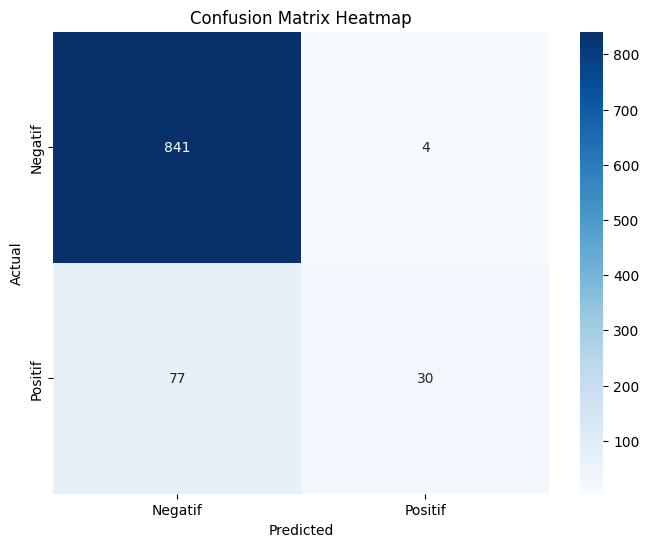

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


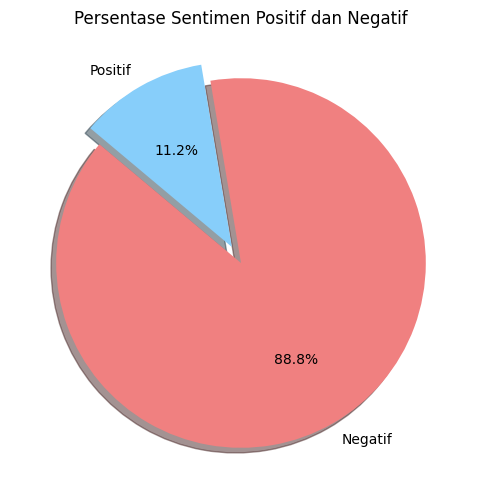

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi kelas sentimen
class_distribution = y_test.value_counts()

# Labels dan data untuk pie chart
labels = class_distribution.index
sizes = class_distribution.values

# Warna untuk setiap bagian pie chart
colors = ['lightcoral', 'lightskyblue']

# Explode untuk melepaskan potongan 'Positif'
explode = (0, 0.1)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Sentimen Positif dan Negatif')
plt.show()